## Importing important libraries

In [78]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
pd.options.mode.chained_assignment = None
from tabulate import tabulate
from matplotlib import cm
import numpy as np
from mpl_toolkits import mplot3d

## Function to extract the data

In [79]:
def extract_points(path, label):
    with open(path, "r") as f:
        lines = f.readlines()
    data_points = []
    for line in lines:
        line = line.strip()
        first, second = line.split()
        data_points.append([float(first),float(second), label])
    return data_points

## Working on linear data

In [80]:
class_1_points = extract_points(r"C:\Users\mishr\Test Codes\Group30\Classification\LS_Group30\Class1.txt", 1)
class_2_points = extract_points(r"C:\Users\mishr\Test Codes\Group30\Classification\LS_Group30\Class2.txt", 2)
class_3_points = extract_points(r"C:\Users\mishr\Test Codes\Group30\Classification\LS_Group30\Class3.txt", 3)

In [81]:
total_data = class_1_points+class_2_points+class_3_points

In [82]:
# forming a data frame

linear_data = pd.DataFrame(total_data, columns=["X1", "X2", "label"])

In [83]:
linear_data

,X1,X2,label
0,19.8100,-5.67060,1
1,16.8130,-4.53270,1
2,21.7920,-7.60480,1
3,16.9420,-4.84060,1
4,18.1280,-4.93910,1
...,...,...,...
1495,-1.7991,-4.91820,3
1496,-2.3629,-0.23106,3
1497,-4.8825,-2.65940,3
1498,-2.2680,-3.32190,3


## Plotting the linear data

[]

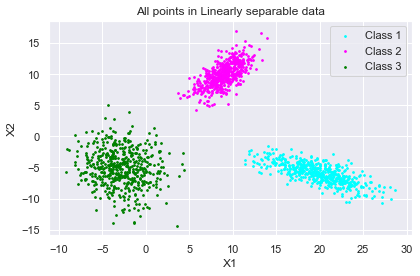

In [84]:
cl1 = linear_data[linear_data.label==1]
cl2 = linear_data[linear_data.label==2]
cl3 = linear_data[linear_data.label==3]
sns.set()
plt.scatter(cl1['X1'], cl1['X2'], color = "cyan", label = "Class 1", s = 3)
plt.scatter(cl2['X1'], cl2['X2'], color = "magenta", label = "Class 2", s = 3)
plt.scatter(cl3['X1'], cl3['X2'], color = 'green', label = "Class 3", s = 3)
plt.legend()
plt.title("All points in Linearly separable data")
plt.xlabel("X1")
plt.ylabel("X2")
plt.tight_layout()
plt.plot()

## One hot encoding of the labels

In [85]:
linear_data['l1'] = 0
linear_data['l2'] = 0
linear_data['l3'] = 0

linear_data.l1[linear_data.label==1] = 1
linear_data.l2[linear_data.label==2] = 1
linear_data.l3[linear_data.label==3] = 1


## Defining a function to train and predict with neural networks

In [86]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    #return sigmoid(x)*(1-sigmoid(x))
    return x*(1-x)

In [87]:
def neural_network(data,label,neuron_hidden):
    samples, features = data.shape
    data = np.hstack((np.ones((samples,1)),data)).reshape((-1,features+1))
    hidden = neuron_hidden
    weight_1 = np.random.rand(features+1,hidden)
    weight_2 = np.random.rand(hidden+1,label.shape[1])
    
    
    epoch = 0
    epoch_error = []
    while epoch<5000:
        epoch+=1
        
        #feedforward
        feed_1 = np.dot(data,weight_1)
        feed_1_act = sigmoid(feed_1)
        feed_1_act = np.hstack((np.ones((feed_1_act.shape[0],1)),feed_1_act))
        
        
        feed_2 = np.dot(feed_1_act,weight_2)
        #feed_1_act = np.delete(feed_1_act,0,axis=1)
        feed_2_act = sigmoid(feed_2)

        
        #backpropagation
        
        error = label-feed_2_act
        error_1 = np.sum(error, axis = 1)
        error_av = np.sum(error_1**2)/(2*samples)
        epoch_error.append((epoch,error_av))
        #error = error*(2/samples)
        
        slope_output_layer = sigmoid_der(feed_2_act)
        slope_hidden_layer = sigmoid_der(feed_1_act)

        #slope_hidden_layer_1 = np.hstack((np.ones((slope_hidden_layer_1.shape[0],1)),slope_hidden_layer_1))
        
        
        
        delta_output = np.multiply(error,slope_output_layer)
        error_hidden = np.dot(delta_output,weight_2.T)
        #error_hidden = np.delete(error_hidden,0,axis=1)
        
        delta_hidden = np.multiply(error_hidden,slope_hidden_layer)
        delta_hidden = np.delete(delta_hidden,0,axis=1)
        
        weight_2 += 0.1*np.dot(feed_1_act.T,delta_output)
        #bias_3 += 0.1*np.sum(delta_output,axis=0,keepdims = True)
        
        weight_1 += 0.1*np.dot(data.T, delta_hidden)
        #bias_1 += 0.1*np.sum(delta_hidden_1,axis=0, keepdims=True)

    
    return weight_1, weight_2,epoch_error
    
        

In [88]:
def predict(data,w1,w2):
    samples, features = data.shape
    data = np.hstack((np.ones((samples,1)),data)).reshape((-1,features+1))
    feed_1 = np.dot(data,w1)
    feed_1_act = sigmoid(feed_1)
    feed_1_act = np.hstack((np.ones((feed_1_act.shape[0],1)),feed_1_act))


    feed_2 = np.dot(feed_1_act,w2)
    #feed_1_act = np.delete(feed_1_act,0,axis=1)
    feed_2_act = sigmoid(feed_2)


    out = feed_2_act.argmax(axis = 1)
    return out+1

## Defining a function to give confusion matrix

In [89]:
def confuse(original,predicted,type_data):
    l_1_1 = 0
    l_1_2 = 0
    l_1_3 = 0
    l_2_1 = 0
    l_2_2 = 0
    l_2_3 = 0
    l_3_1 = 0
    l_3_2 = 0
    l_3_3 = 0
    for i in range(original.shape[0]):
        if original[i] ==1 and predicted[i] ==1:
            l_1_1+=1
        if original[i] ==1 and predicted[i] ==2:
            l_1_2+=1
        if original[i] ==1 and predicted[i] ==3:
            l_1_3+=1
        if original[i] ==2 and predicted[i] ==1:
            l_2_1+=1
        if original[i] ==2 and predicted[i] ==2:
            l_2_2+=1
        if original[i] ==2 and predicted[i] ==3:
            l_2_3+=1
        if original[i] ==3 and predicted[i] ==1:
            l_3_1+=1
        if original[i] ==3 and predicted[i] ==2:
            l_3_2+=1
        if original[i] ==3 and predicted[i] ==3:
            l_3_3+=1

    table = [[" ","Class 1","Class 2","Class 3"],["Class 1", l_1_1,l_1_2,l_1_3],["Class 2", l_2_1,l_2_2,l_2_3],["Class 3",l_3_1,l_3_2,l_3_3]]
    print(f"Confusion Matrix for {type_data} Data ")
    print(tabulate(table))
    print("\n")
    print(f"The Classification accuracy for {type_data} data is ")
    acc =  (l_1_1+l_2_2+l_3_3)/(l_1_1+l_1_2+l_1_3+l_2_1+l_2_2+l_2_3+l_3_1+l_3_2+l_3_3)
    print(acc)

## Shuffling the data 

In [90]:
linear_data = linear_data.sample(frac=1)
linear_data

,X1,X2,label,l1,l2,l3
1047,-2.5521,-10.1620,3,0,0,1
248,25.7810,-7.3736,1,1,0,0
83,20.2010,-5.8153,1,1,0,0
137,21.7880,-5.6339,1,1,0,0
381,20.5770,-4.3808,1,1,0,0
...,...,...,...,...,...,...
648,9.4094,10.4650,2,0,1,0
239,23.3240,-6.4279,1,1,0,0
417,17.5580,-6.0184,1,1,0,0
1399,-3.9197,-5.5305,3,0,0,1


## Dividing data into train, validate and test

In [91]:
train_set = linear_data.iloc[:900,:]
validate_set = linear_data.iloc[900:1200,:]
test_set = linear_data.iloc[1200:,:]

## Training the neural network with the train data

In [92]:
w_train_1, w_train_2, error_epoch_train= neural_network(np.array(train_set[['X1','X2']]),np.array(train_set[['l1','l2','l3']]),9)

In [93]:
training_result = predict(np.array(train_set[['X1','X2']]),w_train_1,w_train_2)

In [94]:
train_set['predicted_label'] = training_result

## Confusion matrix for the training data

In [95]:
original = np.array(train_set.label)
predicted = np.array(train_set.predicted_label)
confuse(original,predicted,"Training")

Confusion Matrix for Training Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  0        303      0
Class 2  0        297      0
Class 3  0        3        297
-------  -------  -------  -------


The Classification accuracy for Training data is 
0.66


## Finding the confusion matrix of test without using validation set

In [96]:
test_result = predict(np.array(test_set[['X1','X2']]),w_train_1,w_train_2)

In [97]:
test_set['predicted_label'] = test_result

In [98]:
original = np.array(train_set.label)
predicted = np.array(train_set.predicted_label)

confuse(original,predicted,"Testing")

Confusion Matrix for Testing Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  0        303      0
Class 2  0        297      0
Class 3  0        3        297
-------  -------  -------  -------


The Classification accuracy for Testing data is 
0.66


## Retraining the neural network using the validation set also

In [99]:
## join the train and validate set together 

del train_set['predicted_label']


In [100]:
validation_data = pd.concat([train_set,validate_set])

In [101]:
w_1_valid, w_2_valid, err_epo_valid = neural_network(np.array(validation_data[['X1','X2']]),np.array(validation_data[['l1','l2','l3']]),9)

In [102]:
new_training_result = predict(np.array(validation_data[['X1','X2']]),w_1_valid,w_2_valid)

In [103]:
validation_data['predicted_label'] = new_training_result

## reprinting confusion matrix for this new train and validation set


In [104]:
original = np.array(validation_data.label)
predicted = np.array(validation_data.predicted_label)
confuse(original,predicted,"Training")

Confusion Matrix for Training Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  403      0        0
Class 2  0        401      0
Class 3  0        0        396
-------  -------  -------  -------


The Classification accuracy for Training data is 
1.0


## Printing the new confusion matrix for test after the validation

In [105]:
new_test_result = predict(np.array(test_set[['X1','X2']]),w_1_valid,w_2_valid)

In [106]:
test_set.predicted_label = new_test_result

In [107]:
original = np.array(test_set.label)
predicted = np.array(test_set.predicted_label)
confuse(original,predicted,"Testing")

Confusion Matrix for Testing Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  97       0        0
Class 2  0        99       0
Class 3  0        0        104
-------  -------  -------  -------


The Classification accuracy for Testing data is 
1.0


## Plotting the average error vs epoch

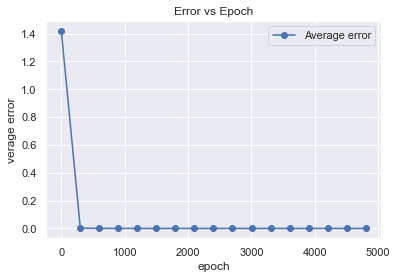

In [108]:
sns.set()
plt.plot(*zip(*err_epo_valid[::300]),marker = "o",label = "Average error")
plt.xlabel("epoch")
plt.ylabel("verage error")
plt.title("Error vs Epoch")
plt.legend()

## Function to plot decision boundary

In [109]:
def plot_decision_boundry(X,Y,w1,w2):
    h = 0.02
    x_min, x_max = X[:,0].min() - 100*h, X[:,0].max() + 100*h
    y_min, y_max = X[:,1].min() - 100*h, X[:,1].max() + 100*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    final = predict(np.c_[xx.ravel(), yy.ravel()],w1,w2)
    final = np.array(final).reshape(xx.shape)
    plt.figure(figsize=(8,8))
    plt.contourf(xx, yy, final, alpha=0.25, cmap="seismic")
    plt.contour(xx, yy, final, colors='k', linewidths=0.5)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.legend()

No handles with labels found to put in legend.


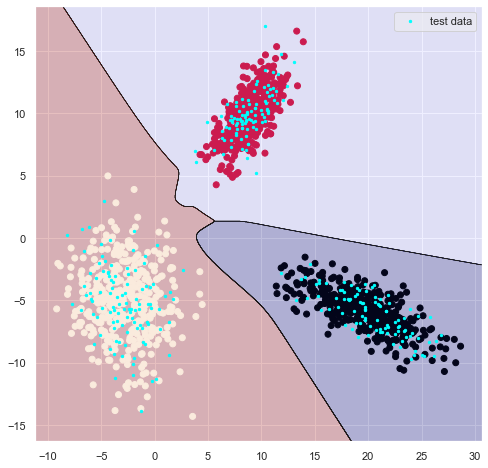

In [110]:
plot_decision_boundry(np.array(validation_data[['X1','X2']]),np.array(validation_data[['label']]),w_1_valid,w_2_valid)
plt.scatter(*zip(*np.array(test_set[['X1','X2']])),color = "cyan",s=5.5,label = "test data")
plt.legend()

In [111]:
linear_data['bias'] = 1

In [112]:
layer_1_op = np.dot(np.array(linear_data[['bias','X1','X2']]),w_1_valid)

In [113]:
layer_1_op = sigmoid(layer_1_op)

In [114]:
data_frame_hidden_1 = pd.DataFrame(layer_1_op)
data_frame_hidden_1.columns = ['a','b','c','d','e','f','g','h','i']
hidden_layer_output = pd.concat([linear_data,data_frame_hidden_1],axis=1)

Text(0.5, 0, '$Sigmoid$')

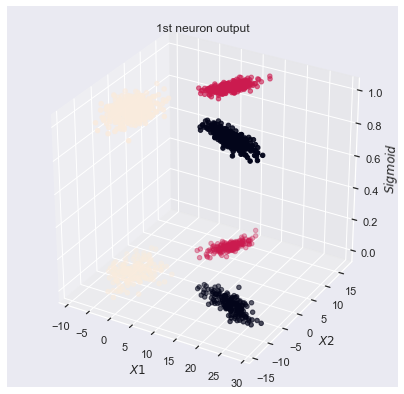

In [115]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output[['X1','X2']])),np.array(hidden_layer_output.a),c=np.array(hidden_layer_output.label))
ax.set_title("1st neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")


Text(0.5, 0, '$Sigmoid$')

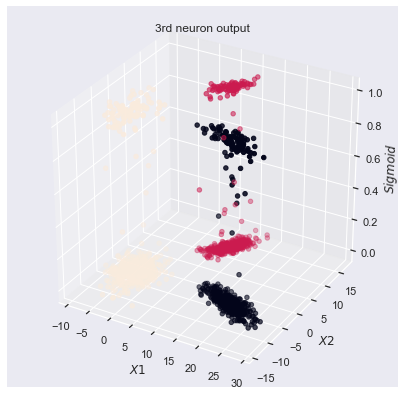

In [116]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output[['X1','X2']])),np.array(hidden_layer_output.c),c=np.array(hidden_layer_output.label))
ax.set_title("3rd neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")


Text(0.5, 0, '$Sigmoid$')

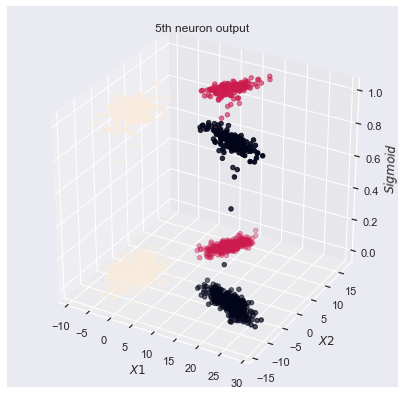

In [117]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output[['X1','X2']])),np.array(hidden_layer_output.e),c=np.array(hidden_layer_output.label))
ax.set_title("5th neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")


Text(0.5, 0, '$Sigmoid$')

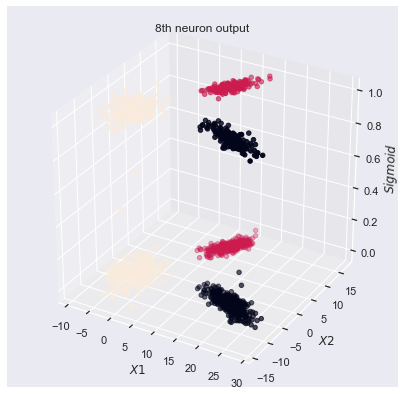

In [118]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output[['X1','X2']])),np.array(hidden_layer_output.h),c=np.array(hidden_layer_output.label))
ax.set_title("8th neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")


## Plotting the output of hidden layers

# For Non-linear data

In [186]:
## Function to create datafrom non-linear data
def extract_points_nl(path):
    with open(path, "r") as f:
        lines = f.readlines()
        print(len(lines))
        print(lines[0])
    data_points = []
    for line in lines[1:501]:
        line = line.strip()
        first, second = line.split()
        data_points.append([float(first),float(second), 1])
    for line in lines[501:1001]:
        line = line.strip()
        first, second = line.split()
        data_points.append([float(first),float(second), 2])
    for line in lines[1001:]:
        line = line.strip()
        first, second = line.split()
        data_points.append([float(first),float(second), 3])
    return data_points

In [187]:
data_nl = extract_points_nl(r"D:\study\Sem 2\Deep Learning\Assignmnet\Assignment 1\Group30\Group30\Classification\NLS_Group30.txt")

1501
First 500 examples - class1; next 500 examples - class 2 and the last 500 examples - class3.



In [188]:
non_linear = pd.DataFrame(data_nl, columns=['X1','X2','label'])
non_linear

,X1,X2,label
0,-2.805403,0.479090,1
1,-2.863374,0.540135,1
2,-1.844841,0.982728,1
3,-1.289484,1.021271,1
4,-1.056815,0.487639,1
...,...,...,...
1495,3.108763,0.198164,3
1496,1.833366,1.175833,3
1497,3.066507,-0.256314,3
1498,3.071702,0.306087,3


## Displaying the classes

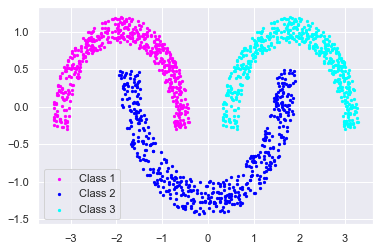

In [189]:
cl1 = non_linear[non_linear.label==1]
cl2 = non_linear[non_linear.label==2]
cl3 = non_linear[non_linear.label==3]

sns.set()
plt.scatter(cl1.X1, cl1.X2, color = 'magenta', s = 5, label = "Class 1")
plt.scatter(cl2.X1, cl2.X2, color = 'blue', s = 5, label = "Class 2")
plt.scatter(cl3.X1, cl3.X2, color = 'cyan', s = 5, label = "Class 3")
plt.legend()


## One hot encoding of the labels

In [190]:
non_linear['l1'] = 0
non_linear['l2'] = 0
non_linear['l3'] = 0

non_linear.l1[non_linear.label==1] = 1
non_linear.l2[non_linear.label==2] = 1
non_linear.l3[non_linear.label==3] = 1


In [191]:
non_linear

,X1,X2,label,l1,l2,l3
0,-2.805403,0.479090,1,1,0,0
1,-2.863374,0.540135,1,1,0,0
2,-1.844841,0.982728,1,1,0,0
3,-1.289484,1.021271,1,1,0,0
4,-1.056815,0.487639,1,1,0,0
...,...,...,...,...,...,...
1495,3.108763,0.198164,3,0,0,1
1496,1.833366,1.175833,3,0,0,1
1497,3.066507,-0.256314,3,0,0,1
1498,3.071702,0.306087,3,0,0,1


## Shuffling the data

In [192]:
non_linear = non_linear.sample(frac= 1)

In [193]:
nl_train_set = non_linear.iloc[:900,:]
nl_validate_set = non_linear.iloc[900:1200,:]
nl_test_set = non_linear.iloc[1200:,:]

## Training the neural network with train data

In [194]:
w_train_1_nl, w_train_2_nl, error_epoch_train_nl= neural_network(np.array(nl_train_set[['X1','X2']]),np.array(nl_train_set[['l1','l2','l3']]),25)

In [195]:
training_result_nl = predict(np.array(nl_train_set[['X1','X2']]),w_train_1_nl,w_train_2_nl)

In [196]:
nl_train_set['predicted_label'] = training_result_nl

## Confusion matrix for training data

In [197]:
original = np.array(nl_train_set.label)
predicted = np.array(nl_train_set.predicted_label)
confuse(original,predicted,"Training")

Confusion Matrix for Training Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  279      0        0
Class 2  0        307      0
Class 3  0        0        314
-------  -------  -------  -------


The Classification accuracy for Training data is 
1.0


## Confusion matrix of test without using the validation data

In [198]:
test_result_nl = predict(np.array(nl_test_set[['X1','X2']]),w_train_1_nl,w_train_2_nl)

In [199]:
nl_test_set['predicted_label'] = test_result_nl

In [200]:
original = np.array(nl_test_set.label)
predicted = np.array(nl_test_set.predicted_label)
confuse(original,predicted,"Testing")

Confusion Matrix for Testing Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  108      0        0
Class 2  0        94       0
Class 3  0        0        98
-------  -------  -------  -------


The Classification accuracy for Testing data is 
1.0


## Retraining the neural network with validation set also

In [201]:
del nl_train_set['predicted_label']
nl_train_set

,X1,X2,label,l1,l2,l3
793,-1.539027,-0.170905,2,0,1,0
41,-1.529891,0.964672,1,1,0,0
800,-1.192303,-0.589609,2,0,1,0
306,-1.992681,0.885967,1,1,0,0
605,-1.428297,-0.463476,2,0,1,0
...,...,...,...,...,...,...
716,1.566315,0.394028,2,0,1,0
963,1.765668,0.452082,2,0,1,0
433,-2.280679,0.935873,1,1,0,0
408,-2.536648,0.994322,1,1,0,0


In [202]:
nl_validation_data = pd.concat([nl_train_set,nl_validate_set])

In [203]:
nl_validation_data

,X1,X2,label,l1,l2,l3
793,-1.539027,-0.170905,2,0,1,0
41,-1.529891,0.964672,1,1,0,0
800,-1.192303,-0.589609,2,0,1,0
306,-1.992681,0.885967,1,1,0,0
605,-1.428297,-0.463476,2,0,1,0
...,...,...,...,...,...,...
304,-2.505710,0.737197,1,1,0,0
658,1.345613,-0.441537,2,0,1,0
309,-3.084014,-0.202915,1,1,0,0
513,-1.190474,-0.594872,2,0,1,0


In [204]:
w_1_valid_nl, w_2_valid_nl, err_epo_valid_nl = neural_network(np.array(nl_validation_data[['X1','X2']]),np.array(nl_validation_data[['l1','l2','l3']]),25)

In [205]:
new_training_result_nl = predict(np.array(nl_validation_data[['X1','X2']]),w_1_valid_nl,w_2_valid_nl)

In [206]:
nl_validation_data['predicted'] = new_training_result_nl

## reprinting the confusion matrix of train with validation data

In [207]:
original = np.array(nl_validation_data.label)
predicted = np.array(nl_validation_data.predicted)
confuse(original,predicted,"Training")

Confusion Matrix for Training Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  392      0        0
Class 2  0        406      0
Class 3  0        0        402
-------  -------  -------  -------


The Classification accuracy for Training data is 
1.0


## Reprinting confusion matrix of test with validation data

In [208]:
new_test_result_nl = predict(np.array(nl_test_set[['X1','X2']]),w_1_valid_nl,w_2_valid_nl)

In [209]:
nl_test_set['predicted_label'] = new_test_result_nl

In [210]:
original = np.array(nl_test_set.label)
predicted = np.array(nl_test_set.predicted_label)
confuse(original,predicted,"Testing")

Confusion Matrix for Testing Data 
-------  -------  -------  -------
         Class 1  Class 2  Class 3
Class 1  108      0        0
Class 2  0        94       0
Class 3  0        0        98
-------  -------  -------  -------


The Classification accuracy for Testing data is 
1.0


## Plotting average error vs epoch

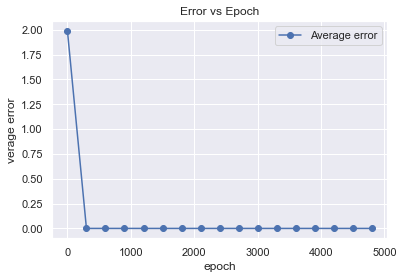

In [211]:
sns.set()
plt.plot(*zip(*err_epo_valid_nl[::300]),marker = "o",label = "Average error")
plt.xlabel("epoch")
plt.ylabel("verage error")
plt.title("Error vs Epoch")
plt.legend()

No handles with labels found to put in legend.


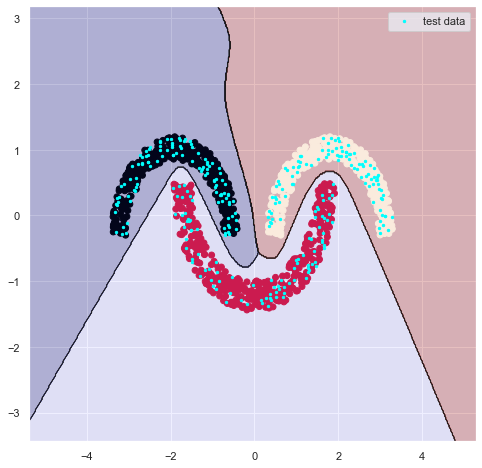

In [212]:
plot_decision_boundry(np.array(nl_validation_data[['X1','X2']]),np.array(nl_validation_data[['label']]),w_1_valid_nl,w_2_valid_nl)
plt.scatter(*zip(*np.array(nl_test_set[['X1','X2']])),color = "cyan",s=5.5,label = "test data")
plt.legend()

## Plotting the value in hidden layer

In [220]:
non_linear['bias'] = 1
non_linear

,X1,X2,label,l1,l2,l3,bias
793,-1.539027,-0.170905,2,0,1,0,1
41,-1.529891,0.964672,1,1,0,0,1
800,-1.192303,-0.589609,2,0,1,0,1
306,-1.992681,0.885967,1,1,0,0,1
605,-1.428297,-0.463476,2,0,1,0,1
...,...,...,...,...,...,...,...
269,-1.505160,1.091341,1,1,0,0,1
1253,1.917023,1.146829,3,0,0,1,1
228,-0.514846,0.227714,1,1,0,0,1
533,-1.791145,0.442175,2,0,1,0,1


In [221]:
layer_1_op_nl = np.dot(np.array(non_linear[['bias','X1','X2']]),w_1_valid_nl)

In [222]:
layer_1_op_nl = sigmoid(layer_1_op_nl)


In [223]:
data_frame_hidden_1_nl = pd.DataFrame(layer_1_op_nl)
data_frame_hidden_1_nl.columns = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
hidden_layer_output_nl = pd.concat([non_linear,data_frame_hidden_1_nl],axis=1)

In [224]:
hidden_layer_output_nl

,X1,X2,label,l1,l2,l3,bias,a,b,c,...,p,q,r,s,t,u,v,w,x,y
0,-2.805403,0.479090,1,1,0,0,1,1.715526e-05,5.008885e-05,0.960445,...,8.761022e-05,0.000069,3.617430e-06,0.000202,3.116185e-03,1.234457e-05,5.852438e-06,0.000076,1.725767e-05,3.768699e-05
1,-2.863374,0.540135,1,1,0,0,1,5.252051e-04,1.729619e-07,0.637783,...,2.216324e-04,0.000365,6.918385e-05,0.000614,8.840951e-01,7.697190e-08,1.028240e-04,0.000387,1.439891e-04,1.156177e-03
2,-1.844841,0.982728,1,1,0,0,1,5.391739e-05,1.880986e-03,0.991401,...,2.145123e-04,0.000084,3.449906e-06,0.000278,4.562167e-03,4.256756e-04,5.515941e-06,0.000094,1.991950e-05,1.001887e-04
3,-1.289484,1.021271,1,1,0,0,1,1.728340e-05,3.365892e-08,0.492091,...,4.055951e-05,0.000112,1.427458e-05,0.000218,5.676453e-02,1.209140e-08,2.258968e-05,0.000120,3.662631e-05,4.741321e-05
4,-1.056815,0.487639,1,1,0,0,1,1.545797e-05,3.544522e-04,0.982983,...,1.028804e-04,0.000059,2.366950e-06,0.000192,1.199046e-03,7.828408e-05,3.859880e-06,0.000065,1.347267e-05,3.215926e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,3.108763,0.198164,3,0,0,1,1,9.051856e-04,1.019932e-07,0.577629,...,2.672964e-04,0.000464,1.031722e-04,0.000730,9.578128e-01,4.891497e-08,1.514504e-04,0.000490,1.942299e-04,1.970061e-03
1496,1.833366,1.175833,3,0,0,1,1,9.999999e-01,2.062006e-01,0.997412,...,9.804887e-01,0.580066,7.570643e-01,0.486603,1.000000e+00,3.161240e-01,7.494061e-01,0.575123,6.468300e-01,9.999999e-01
1497,3.066507,-0.256314,3,0,0,1,1,5.993612e-02,6.062411e-04,0.981838,...,4.466296e-03,0.001316,2.119630e-04,0.002489,9.984575e-01,2.696310e-04,2.935500e-04,0.001400,5.403034e-04,7.944263e-02
1498,3.071702,0.306087,3,0,0,1,1,1.858833e-05,7.592683e-07,0.792433,...,5.827648e-05,0.000094,8.288642e-06,0.000216,1.889897e-02,2.338015e-07,1.322109e-05,0.000102,2.749426e-05,4.620823e-05


Text(0.5, 0, '$Sigmoid$')

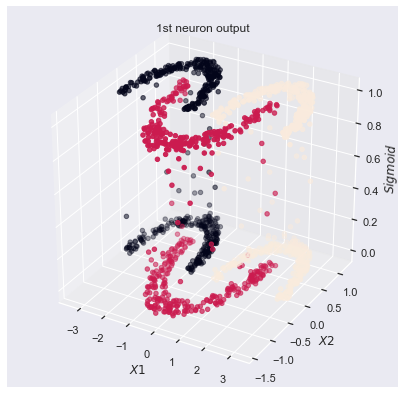

In [226]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output_nl[['X1','X2']])),np.array(hidden_layer_output_nl.a),c=np.array(hidden_layer_output_nl.label))
ax.set_title("1st neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")


Text(0.5, 0, '$Sigmoid$')

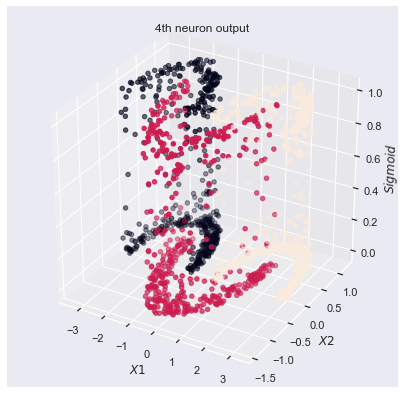

In [227]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output_nl[['X1','X2']])),np.array(hidden_layer_output_nl.d),c=np.array(hidden_layer_output_nl.label))
ax.set_title("4th neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")

Text(0.5, 0, '$Sigmoid$')

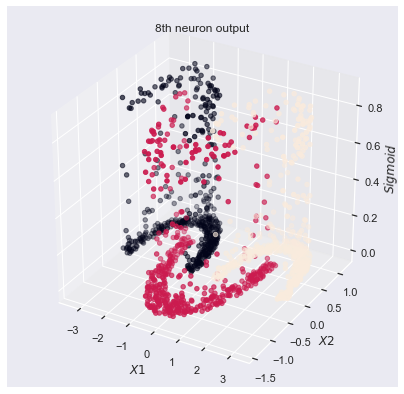

In [228]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output_nl[['X1','X2']])),np.array(hidden_layer_output_nl.h),c=np.array(hidden_layer_output_nl.label))
ax.set_title("8th neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")

Text(0.5, 0, '$Sigmoid$')

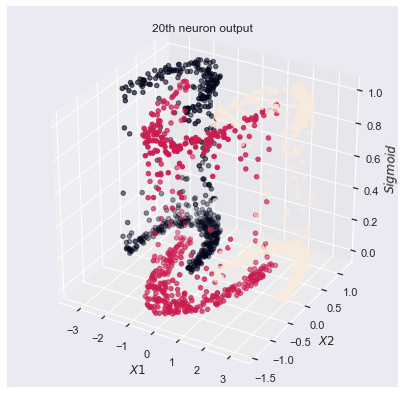

In [231]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output_nl[['X1','X2']])),np.array(hidden_layer_output_nl.u),c=np.array(hidden_layer_output_nl.label))
ax.set_title("20th neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")


Text(0.5, 0, '$Sigmoid$')

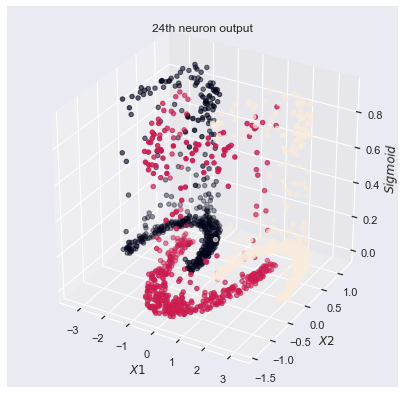

In [232]:
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection = '3d')
ax.scatter(*zip(*np.array(hidden_layer_output_nl[['X1','X2']])),np.array(hidden_layer_output_nl.x),c=np.array(hidden_layer_output_nl.label))
ax.set_title("24th neuron output")
ax.set_xlabel("$X1$")
ax.set_ylabel("$X2$")
ax.set_zlabel("$Sigmoid$")
